# $D_{hh}$ Formulas

There were different version of the $D_{hh}$ formulas in the ATLAS internal note and the paper.

**From the internal note**

$$D_{hh} = \sqrt{\left(m_{2j}^{lead}\right)^2 + \left( m_{2j}^{subl}\right)^2} \left| \sin \left( \tan^{-1}\left( \frac{m_{2j}^{subl}}{m_{2j}^{lead}} \right) - \tan^{-1}\left( \frac{110}{120} \right)  \right) \right| $$

**From the paper**

$$D_{hh} = \frac{|m_{2j}^{lead} - \frac{120}{110} m_{2j}^{subl}|}{\sqrt{1 + (\frac{120}{110})^2}}$$


**Goal:** Test the assertion that these two formulas are the same.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m_lead = np.linspace(0,250)
m_subl = np.linspace(0,250)

In [4]:
def paper(m1,m2):
    s = 120/110
    return np.abs(m1 - s*m2) / np.sqrt(1+s**2)

In [5]:
def int_note(m1,m2):
    Dhh = np.sqrt(m1**2 + m2**2) * np.abs(np.sin(np.arctan(m2/m1) - np.arctan(110/120)))
    return Dhh

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


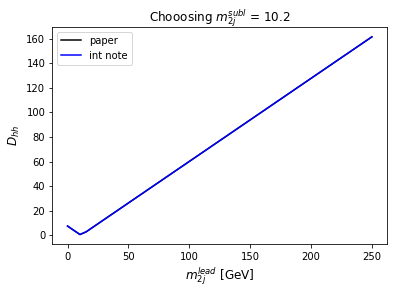

In [14]:
# Vary m1 and test formulas
random_m2 = np.random.choice(m_subl)

for f, label, c in zip([paper,int_note],['paper','int note'],['k','b']):
    y = np.array([f(m1,random_m2) for m1 in m_lead])
    plt.plot(m_lead,y,c,label=label)
    
plt.xlabel('$m_{2j}^{lead}$ [GeV]',fontsize=12)
plt.ylabel('$D_{hh}$',fontsize=12)
plt.legend()
plt.title('Chooosing $m_{2j}^{subl}$ = '+'{:.3}'.format(random_m2))

plt.show()

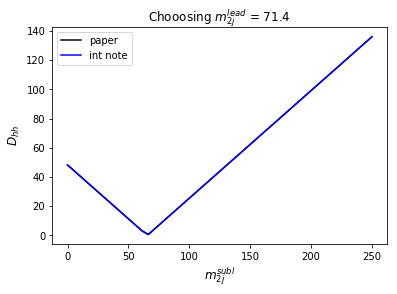

In [15]:
# Vary m1 and test formulas
random_m1 = np.random.choice(m_lead)

for f, label, c in zip([paper,int_note],['paper','int note'],['k','b']):
    y = np.array([f(random_m1,m2) for m2 in m_subl])
    plt.plot(m_subl,y,c,label=label)
    
plt.xlabel('$m_{2j}^{subl}$',fontsize=12)
plt.ylabel('$D_{hh}$',fontsize=12)
plt.legend()
plt.title('Chooosing $m_{2j}^{lead}$ = '+'{:.3}'.format(random_m1))

plt.show()

**Good news:** The paper and the internal note formulas *match*, as expected.